In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from float2d_to_rgb_layer import Float2DToRGB
from melspectrogram_layer import MelSpectrogram
from power_to_db_layer import PowerToDb
N_FFT = 2048
N_MELS = 224
N_TIMESTEPS = 224
POWER = 2
AUDIO_SR = 32000
WAVE_LEN_SAMPLES = AUDIO_SR * 5
WAVE_DTYPE = np.float16
SIGNAL_LENGTH = 5


In [7]:
PowerToDb

power_to_db_layer.PowerToDb

In [6]:
wave = np.random.randn((WAVE_LEN_SAMPLES)).astype(WAVE_DTYPE)
waves = np.repeat(wave[np.newaxis, ...], 16, axis=0)
i_wave = x = keras.layers.Input(shape=WAVE_LEN_SAMPLES, dtype=WAVE_DTYPE)
x = MelSpectrogram(
    sample_rate=AUDIO_SR,
    fft_size=N_FFT,
    n_mels=N_MELS,
    hop_size=WAVE_LEN_SAMPLES // (N_TIMESTEPS - 1),
    power=POWER,

)(x)
o_float = x = PowerToDB()(x)
o_rgb = x = Float2DToRGB()(x)
m = keras.models.Model(inputs=[i_wave], outputs=[o_float, o_rgb])
msgs_f, msgs_rgb = m.predict(waves)
plt.imshow(msgs_f[0])
plt.figure()
plt.imshow(msgs_rgb[0])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



NameError: name 'PowerToDB' is not defined

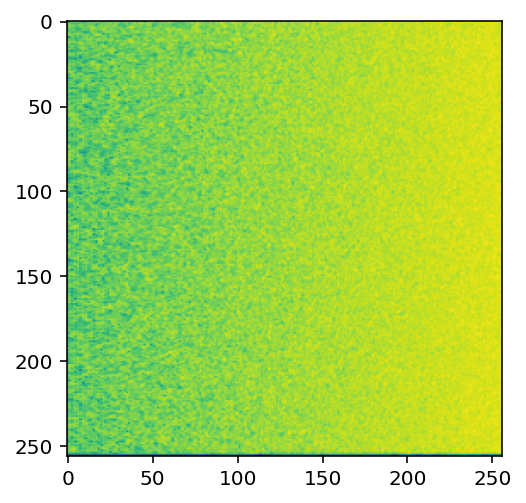

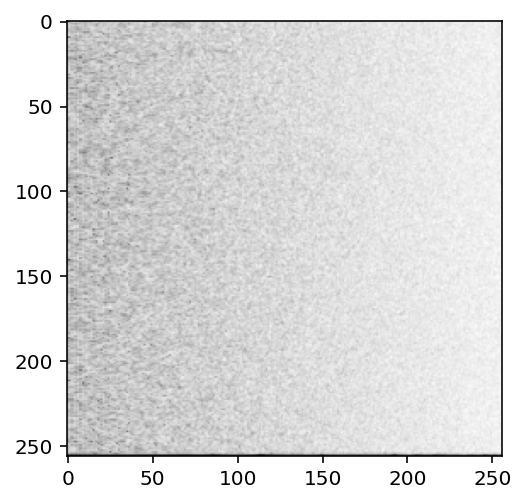

In [9]:
N_FFT = 2048
N_MELS = 256
N_TIMESTEPS = 256
POWER = 2
AUDIO_SR = 32000
WAVE_LEN_SAMPLES = AUDIO_SR * 5
WAVE_DTYPE = np.float32
wave = np.random.randn((WAVE_LEN_SAMPLES)).astype(WAVE_DTYPE)
waves = np.repeat(wave[np.newaxis, ...], 16, axis=0)
i_wave = x = keras.layers.Input(shape=WAVE_LEN_SAMPLES, dtype=WAVE_DTYPE)
x = MelSpectrogram(
    sample_rate=AUDIO_SR,
    fft_size=N_FFT,
    n_mels=N_MELS,
    hop_size=WAVE_LEN_SAMPLES // (N_TIMESTEPS - 1),
    power=POWER,
)(x)
o_float = x = PowerToDb()(x)
o_rgb = x = Float2DToRGB()(x)
m = keras.models.Model(inputs=[i_wave], outputs=[o_float, o_rgb])
msgs_f, msgs_rgb = m.predict(waves)
plt.imshow(msgs_f[0])
plt.figure()
plt.imshow(msgs_rgb[0])